In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout,Flatten,Dense,Input,AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [3]:
dataset = "./Data"

In [4]:
INIT_LR = 1e-3
EPOCHS = 10
BS = 8

In [5]:
args = {}
args["dataset"] = dataset

In [6]:
args

{'dataset': './Data'}

In [7]:
import numpy as np
import cv2
import os
from imutils import paths

iPaths = list(paths.list_images(args["dataset"]))
# print(iPaths)
data = []
labels = []

for ipath in iPaths:
    label = ipath.split(os.path.sep)[-2]
    image = cv2.imread(ipath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224))
    data.append(image)
    labels.append(label)
    
data = np.array(data)/255.0    

In [16]:
image.shape

(1206, 1812, 3)

In [13]:
# iPaths = list(paths.list_images(args["dataset"]))
# for ipath in iPaths:
#     label = ipath.split(os.path.sep)
#     print(label)

['.', 'Data', 'Covid', 'covid-19-pneumonia-7-PA.jpg']
['.', 'Data', 'Covid', '16660_4_1.jpg']
['.', 'Data', 'Covid', '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4b.png']
['.', 'Data', 'Covid', '16654_2_1.jpg']
['.', 'Data', 'Covid', '16664_1_1.jpg']
['.', 'Data', 'Covid', '446B2CB6-B572-40AB-B01F-1910CA07086A.jpeg']
['.', 'Data', 'Covid', 'covid-19-pneumonia-58-day-10.jpg']
['.', 'Data', 'Covid', '4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg']
['.', 'Data', 'Covid', 'covid-19-infection-exclusive-gastrointestinal-symptoms-l.png']
['.', 'Data', 'Covid', 'covid-19-pneumonia-22-day1-pa.png']
['.', 'Data', 'Covid', 'all14238-fig-0001-m-b.jpg']
['.', 'Data', 'Covid', '1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg']
['.', 'Data', 'Covid', 'covid-19-pneumonia-58-day-9.jpg']
['.', 'Data', 'Covid', '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png']
['.', 'Data', 'Covid', '16654_1_1.png']
['.', 'Data', 'Covid', '8FDE8DBA-CFBD-4B4C-B1A4-6F36A93B7E87.jpeg']
['.', 'Data', 'Covid', '

In [8]:
labels = np.array(labels)

In [9]:
labels[0]

'Covid'

In [10]:
Cimages = os.listdir(dataset+"/Covid")
Nimages = os.listdir(dataset+"/Normal")

Normal Chest X-ray Vs Covid-19 Chest X-ray


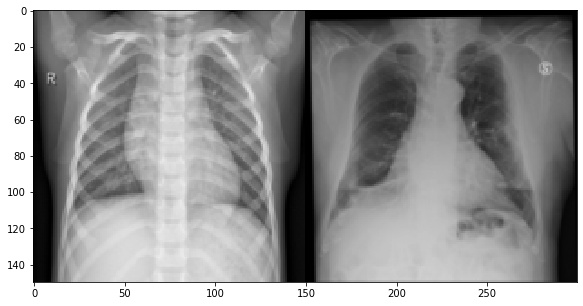

Normal Chest X-ray Vs Covid-19 Chest X-ray


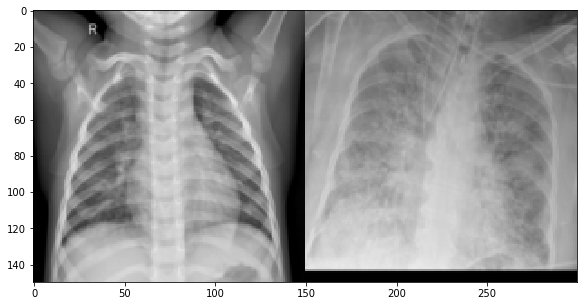

Normal Chest X-ray Vs Covid-19 Chest X-ray


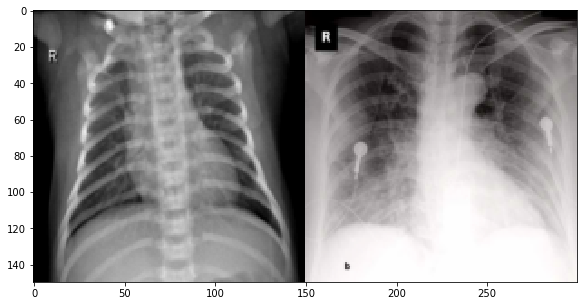

Normal Chest X-ray Vs Covid-19 Chest X-ray


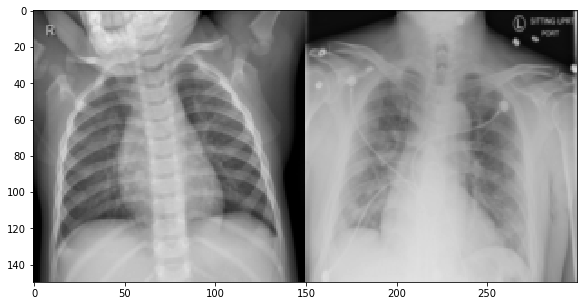

Normal Chest X-ray Vs Covid-19 Chest X-ray


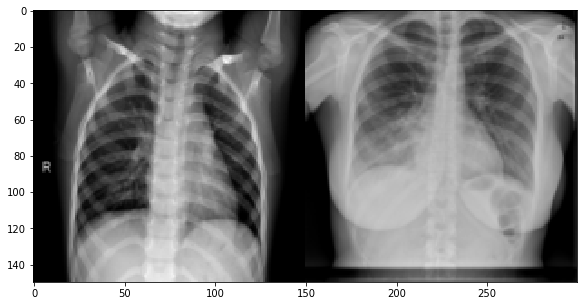

In [11]:
import skimage
from skimage.transform import resize

def plotter(i):
    normal = cv2.imread(dataset + "/Normal/" + Nimages[i])
    normal = resize(normal,(150,150,3))
    corona = cv2.imread(dataset + "/Covid/" + Cimages[i])
    corona = resize(corona,(150,150,3),mode='reflect')
    pair = np.concatenate((normal,corona),axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()

for i in range(0,5):
    plotter(i)

In [12]:
LB = LabelBinarizer()
labels = LB.fit_transform(labels)#Converts strings to labels
labels = to_categorical(labels)#Converts numbers to onehot vector
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [13]:
(X_train,X_test,Y_train,Y_test) = train_test_split(data,labels,test_size=0.2,random_state=42,stratify=labels)

In [14]:
X_train.shape

(160, 224, 224, 3)

In [15]:
trainAug = ImageDataGenerator(rotation_range=15,fill_mode="nearest")
trainAug

In [16]:
bmodel = VGG16(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))

In [17]:
bmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
hmodel = bmodel.output
hmodel = AveragePooling2D(pool_size=(4,4))(hmodel)
hmodel = Flatten(name="Flatten")(hmodel)
hmodel = Dense(64,activation="relu")(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation="softmax")(hmodel)

model = Model(bmodel.input,hmodel)

In [19]:
for layer in bmodel.layers:
    layer.trainable=False

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

/home/hemanth/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


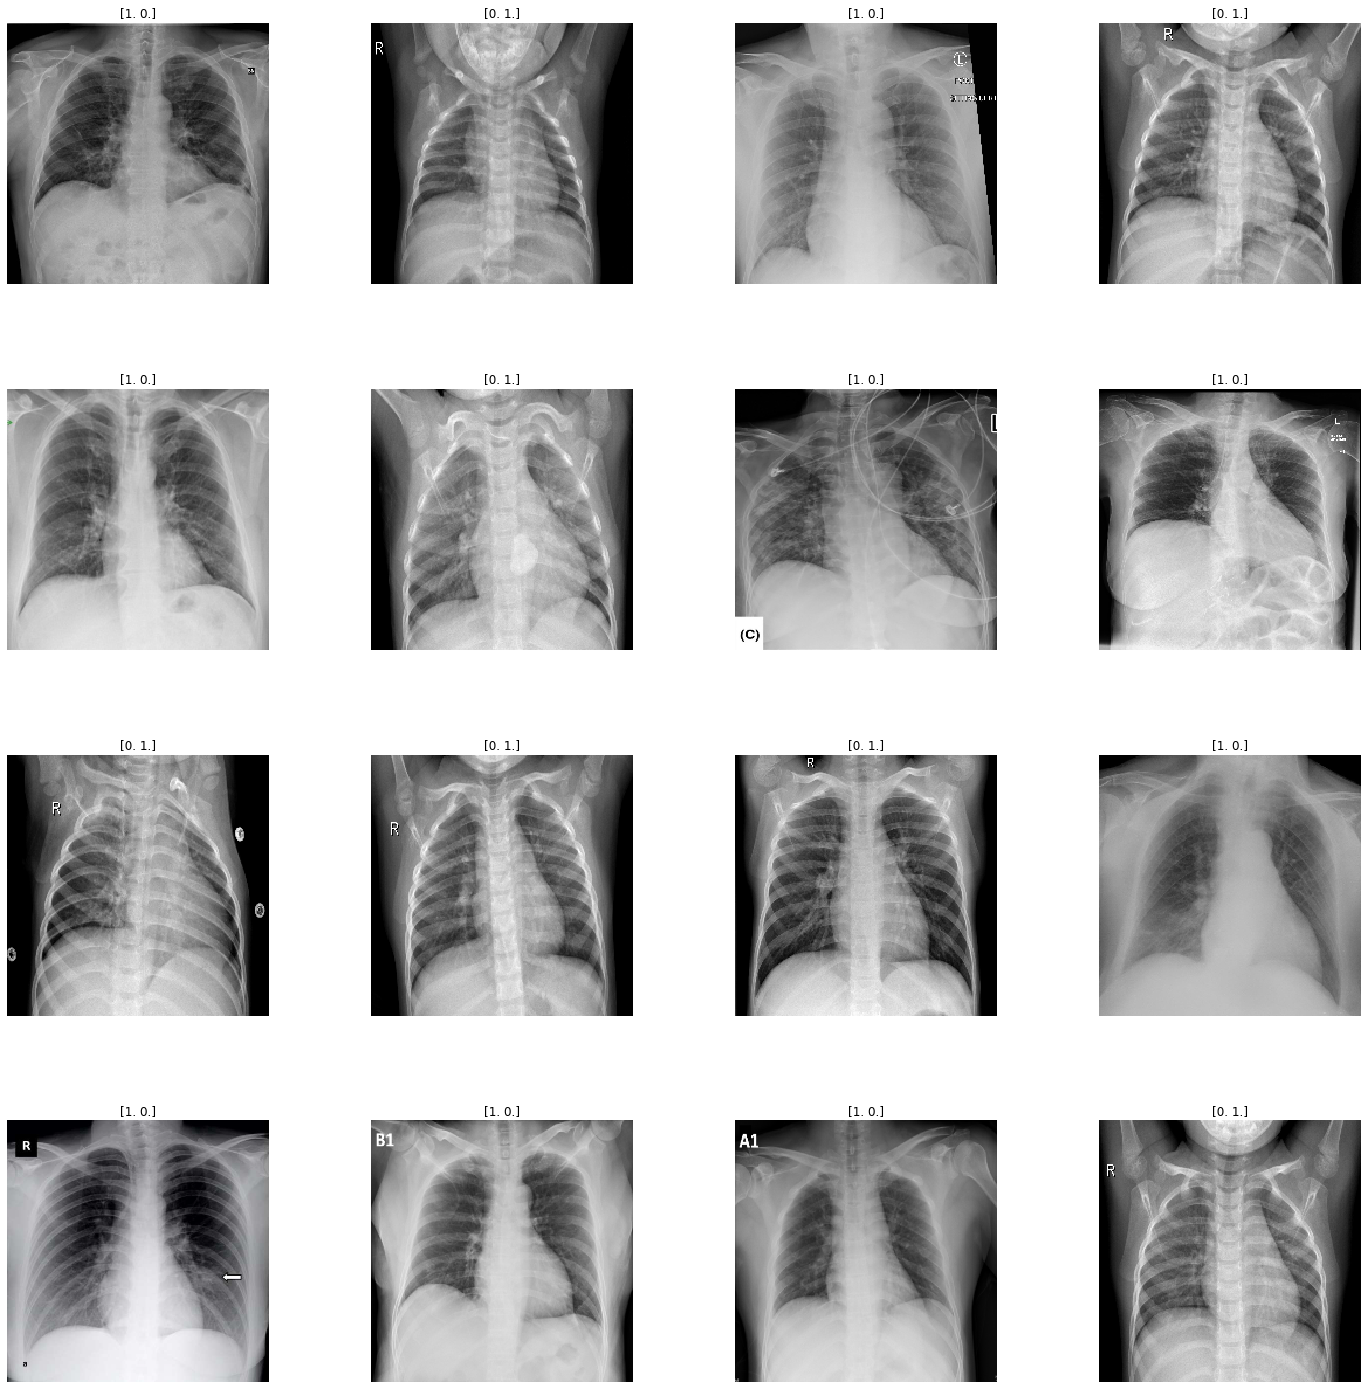

In [21]:
W_grid = 4 #width
L_grid = 4 #lenth
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [22]:
opt = Adam(lr=INIT_LR,decay=INIT_LR/EPOCHS)

In [23]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [24]:
R = model.fit_generator(trainAug.flow(X_train,Y_train,batch_size=BS),
             steps_per_epoch=len(X_train)//BS,
             validation_data=(X_test,Y_test),
             validation_steps=len(X_test)//BS,
             epochs=EPOCHS)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - 51s 3s/step - loss: 0.6467 - accuracy: 0.6375 - val_loss: 0.5183 - val_accuracy: 0.7500
Epoch 2/10
20/20 [==============================] - 48s 2s/step - loss: 0.5255 - accuracy: 0.7375 - val_loss: 0.3930 - val_accuracy: 0.9500
Epoch 3/10
20/20 [==============================] - 51s 3s/step - loss: 0.3454 - accuracy: 0.9125 - val_loss: 0.3153 - val_accuracy: 0.9750
Epoch 4/10
20/20 [==============================] - 37s 2s/step - loss: 0.2769 - accuracy: 0.9312 - val_loss: 0.2544 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 36s 2s/step - loss: 0.2424 - accuracy: 0.9438 - val_loss: 0.2142 - val_accuracy: 0.9750
Epoch 6/10
20/20 [==============================] - 44s 2s/step - loss: 0.2041 - accuracy: 0.9625 - val_loss: 0.1779 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 43s 2s/step - loss: 0.1915 - acc

In [27]:
y_pred = model.predict(X_test,batch_size=BS)
y_pred

array([[0.01418861, 0.98581135],
       [0.8152691 , 0.18473092],
       [0.92410934, 0.07589065],
       [0.97646505, 0.023535  ],
       [0.10420599, 0.8957941 ],
       [0.8426592 , 0.15734085],
       [0.01885809, 0.98114187],
       [0.8838448 , 0.11615521],
       [0.89835787, 0.10164217],
       [0.06011165, 0.93988836],
       [0.82488513, 0.17511496],
       [0.9861653 , 0.01383467],
       [0.07176752, 0.9282325 ],
       [0.7124359 , 0.28756404],
       [0.18019192, 0.81980807],
       [0.09781598, 0.902184  ],
       [0.9789019 , 0.02109807],
       [0.05941693, 0.94058305],
       [0.0674549 , 0.9325451 ],
       [0.9972289 , 0.00277103],
       [0.03240942, 0.96759063],
       [0.9892189 , 0.01078105],
       [0.9603637 , 0.03963626],
       [0.99009234, 0.00990768],
       [0.9795059 , 0.02049414],
       [0.9877515 , 0.01224852],
       [0.9817078 , 0.01829219],
       [0.16801758, 0.8319825 ],
       [0.9242926 , 0.07570735],
       [0.05240951, 0.9475905 ],
       [0.

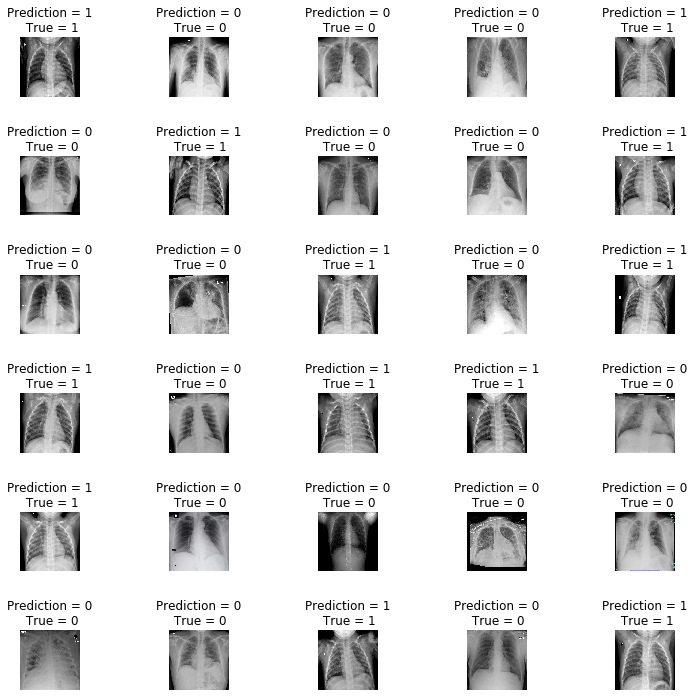

In [28]:
L=6
W=5
fig,axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
for i in range(W*L):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)   

In [29]:
from sklearn.metrics import classification_report

y_pred = np.argmax(y_pred,axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        20
      Normal       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

1.0

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
cm

array([[20,  0],
       [ 0, 20]])

In [32]:
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[20  0]
 [ 0 20]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


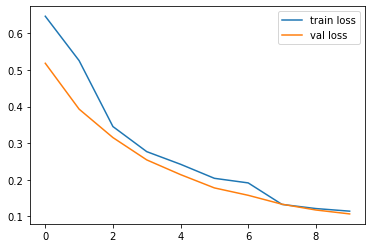

<Figure size 432x288 with 0 Axes>

In [33]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

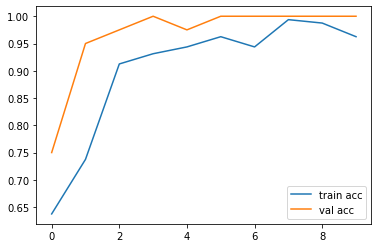

In [34]:
# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [35]:
model.save('Covid_model.h5')

Using TensorFlow backend.


Prediction: Corona


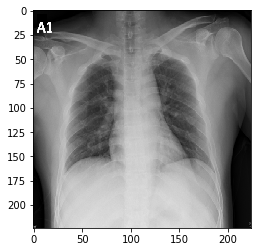

In [36]:
import tensorflow as tf 
from keras.preprocessing import image
#from keras.models import load_model
model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg16 import preprocess_input
img = image.load_img('Data/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')

Prediction: Normal


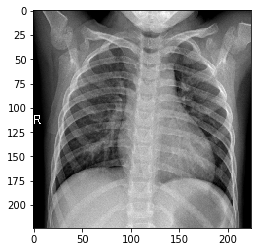

In [37]:
img = image.load_img('Data/Normal/IM-0162-0001.jpeg', target_size=(224, 224)) #insert a random normal x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')